<h1 style="text-align: center; font-family: 'Lucida Console', 'Courier New', monospace;">Singapore HDB Flat Resale Prices (2017-2020)</h1>

<img src="https://i.ibb.co/rw6XmCG/peter-nguyen-singapore.jpg" alt="peter-nguyen-singapore-image" border="0">

<h3 style="font-family: 'Lucida Console', 'Courier New', monospace;">Data Preparation</h3>

In [360]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [361]:
df = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv", parse_dates=["month"])
df.rename({"month": "year"}, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80374 entries, 0 to 80373
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year                 80374 non-null  datetime64[ns]
 1   town                 80374 non-null  object        
 2   flat_type            80374 non-null  object        
 3   block                80374 non-null  object        
 4   street_name          80374 non-null  object        
 5   storey_range         80374 non-null  object        
 6   floor_area_sqm       80374 non-null  float64       
 7   flat_model           80374 non-null  object        
 8   lease_commence_date  80374 non-null  int64         
 9   remaining_lease      80374 non-null  object        
 10  resale_price         80374 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 6.7+ MB


In [362]:
df.shape

(80374, 11)

In [363]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,80374.000000,80374.000000,8.037400e+04
mean,97.617804,1994.117501,4.393165e+05
std,24.285811,12.839267,1.533902e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.300000e+05
50%,95.000000,1994.000000,4.100000e+05
75%,113.000000,2003.000000,5.150000e+05
max,249.000000,2019.000000,1.258000e+06


In [364]:
df.head()

,year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [365]:
df.iloc[10000:10006]

,year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
10000,2017-07-01,BUKIT BATOK,4 ROOM,289G,BT BATOK ST 25,04 TO 06,102.0,Model A,1998,80 years,450000.0
10001,2017-07-01,BUKIT BATOK,4 ROOM,395,BT BATOK WEST AVE 5,19 TO 21,92.0,Model A,2004,86 years 02 months,460000.0
10002,2017-07-01,BUKIT BATOK,4 ROOM,384,BT BATOK WEST AVE 5,10 TO 12,92.0,Model A,2005,86 years 06 months,465000.0
10003,2017-07-01,BUKIT BATOK,4 ROOM,621,BT BATOK CTRL,25 TO 27,90.0,Model A,2003,85 years 04 months,570000.0
10004,2017-07-01,BUKIT BATOK,5 ROOM,387,BT BATOK WEST AVE 5,01 TO 03,118.0,Improved,2004,86 years 04 months,479000.0
10005,2017-07-01,BUKIT BATOK,5 ROOM,392,BT BATOK WEST AVE 5,01 TO 03,118.0,Improved,2004,86 years 03 months,485000.0


In [366]:
all_flat_types = sorted(np.array(df["flat_type"].unique()))
print(all_flat_types)

['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']


In [367]:
all_flat_models = sorted(np.array(df["flat_model"].unique()))
print(all_flat_models)

['2-room', 'Adjoined flat', 'Apartment', 'DBSS', 'Improved', 'Improved-Maisonette', 'Maisonette', 'Model A', 'Model A-Maisonette', 'Model A2', 'Multi Generation', 'New Generation', 'Premium Apartment', 'Premium Apartment Loft', 'Premium Maisonette', 'Simplified', 'Standard', 'Terrace', 'Type S1', 'Type S2']


In [368]:
all_storey_ranges = sorted(np.array(df["storey_range"].unique()))
print(all_storey_ranges)

['01 TO 03', '04 TO 06', '07 TO 09', '10 TO 12', '13 TO 15', '16 TO 18', '19 TO 21', '22 TO 24', '25 TO 27', '28 TO 30', '31 TO 33', '34 TO 36', '37 TO 39', '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51']


In [421]:
all_lease_commence_dates = sorted(np.array(df["lease_commence_date"].unique()))
print(all_lease_commence_dates)

[1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [369]:
all_town_names = sorted(np.array(df["town"].unique()))
print(all_town_names)

['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH', 'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL', 'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN']


In [370]:
df[df["resale_price"] == df["resale_price"].max()]

,year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
78480,2020-09-01,CENTRAL AREA,5 ROOM,1B,CANTONMENT RD,43 TO 45,107.0,Type S2,2011,89 years 04 months,1258000.0


In [371]:
df[df["resale_price"] == df["resale_price"].min()]

,year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
67560,2020-02-01,TOA PAYOH,3 ROOM,26,TOA PAYOH EAST,10 TO 12,67.0,Improved,1971,49 years 11 months,140000.0


<h3 style="font-family: 'Lucida Console', 'Courier New', monospace;">Data Manipulation and Analysis</h3>

In [372]:
df["flat_type"].value_counts()

4 ROOM              33282
5 ROOM              19947
3 ROOM              19420
EXECUTIVE            6411
2 ROOM               1240
1 ROOM                 37
MULTI-GENERATION       37
Name: flat_type, dtype: int64

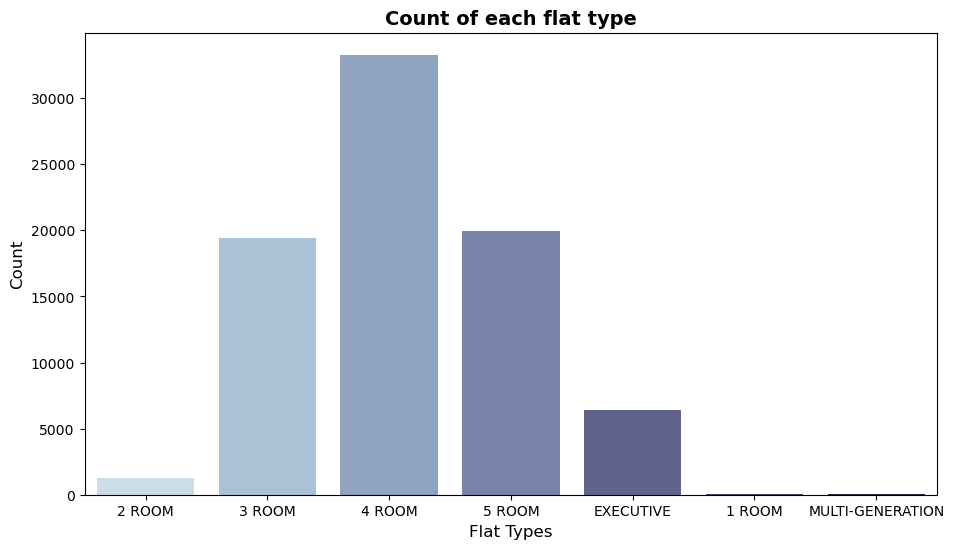

In [373]:
fig, ax = plt.subplots(figsize=(11, 6))
ax = sns.countplot(x="flat_type", palette="ch:s=.25,rot=-.25", data=df)
ax.set_title("Count of each flat type", fontsize=14, fontweight="bold")
ax.set_xlabel("Flat Types", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [374]:
df["flat_model"].value_counts()

Model A                   26288
Improved                  20067
New Generation            11061
Premium Apartment          8689
Simplified                 3368
Apartment                  3257
Maisonette                 2376
Standard                   2260
DBSS                       1332
Model A2                   1045
Adjoined flat               152
Model A-Maisonette          136
Type S1                     134
Type S2                      74
Terrace                      46
Multi Generation             37
Premium Apartment Loft       26
Improved-Maisonette          14
Premium Maisonette           10
2-room                        2
Name: flat_model, dtype: int64

In [375]:
df_flat_models = df[df["flat_model"].isin(["Model A", "Improved", "New Generation", "Premium Apartment", "Simplified", 
                                           "Apartment", "Maisonette", "Standard", "DBSS", "Model A2"])]

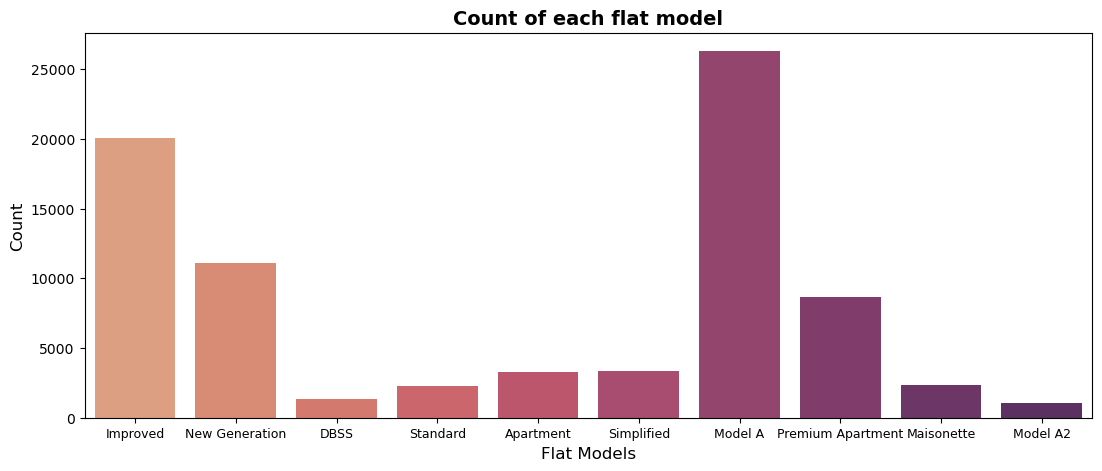

In [376]:
fig, ax = plt.subplots(figsize=(13, 5))
ax = sns.countplot(x="flat_model", palette="flare", data=df_flat_models)
ax.set_title("Count of each flat model", fontsize = 14, fontweight="bold")
ax.set_xlabel("Flat Models", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.xticks(fontsize=9)
plt.show()

In [377]:
print("The smallest apartment in the dataset:", df["floor_area_sqm"].min())
print("The average floor area:", df["floor_area_sqm"].mean())
print("The median of floor area:", df["floor_area_sqm"].median())
print("The biggest floor area is", df["floor_area_sqm"].max())

The smallest apartment in the dataset: 31.0
The average floor area: 97.61780426506076
The median of floor area: 95.0
The biggest floor area is 249.0


In [378]:
df_floor_area_median = df.groupby("flat_type")["floor_area_sqm"].median()
print(df_floor_area_median)

flat_type
1 ROOM               31.0
2 ROOM               46.0
3 ROOM               67.0
4 ROOM               93.0
5 ROOM              118.0
EXECUTIVE           146.0
MULTI-GENERATION    165.0
Name: floor_area_sqm, dtype: float64


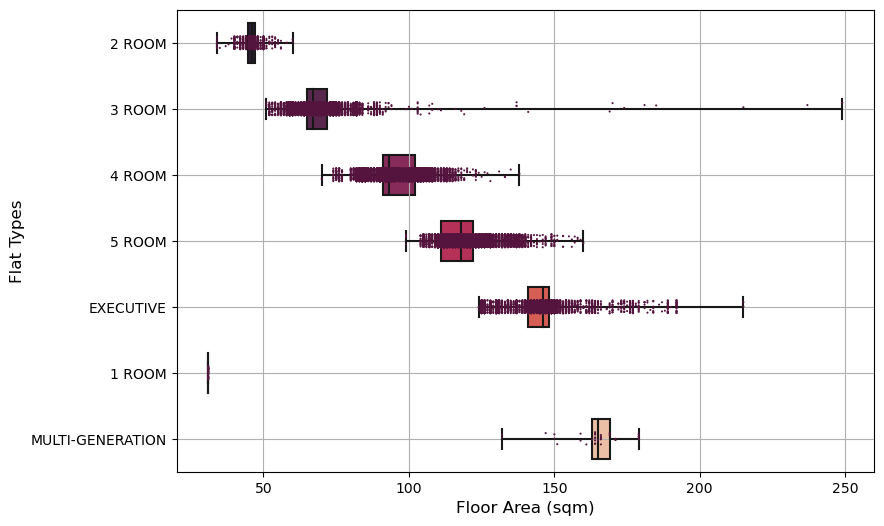

In [379]:
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.boxplot(x="floor_area_sqm", y="flat_type", data=df, whis=[0, 100], width=0.6, palette="rocket")
ax = sns.stripplot(x="floor_area_sqm", y="flat_type", data=df, size=1.5, color="#55143E", linewidth=0)
ax.set_xlabel("Floor Area (sqm)", fontsize=12)
ax.set_ylabel("Flat Types", fontsize=12)
ax.grid(True)
plt.show()

In [380]:
num_of_flats_by_town = df.groupby(["town"])["flat_type"].agg(["count"]).sort_values(by="count", ascending=False)
print(num_of_flats_by_town)

                 count
town                  
SENGKANG          6408
WOODLANDS         6019
JURONG WEST       5984
YISHUN            5641
TAMPINES          5235
PUNGGOL           5119
BEDOK             4356
HOUGANG           3848
ANG MO KIO        3613
CHOA CHU KANG     3333
BUKIT PANJANG     3197
BUKIT MERAH       3097
BUKIT BATOK       2953
TOA PAYOH         2646
PASIR RIS         2421
KALLANG/WHAMPOA   2275
QUEENSTOWN        2140
SEMBAWANG         2104
GEYLANG           1928
JURONG EAST       1793
CLEMENTI          1785
SERANGOON         1601
BISHAN            1535
CENTRAL AREA       658
MARINE PARADE      465
BUKIT TIMAH        220


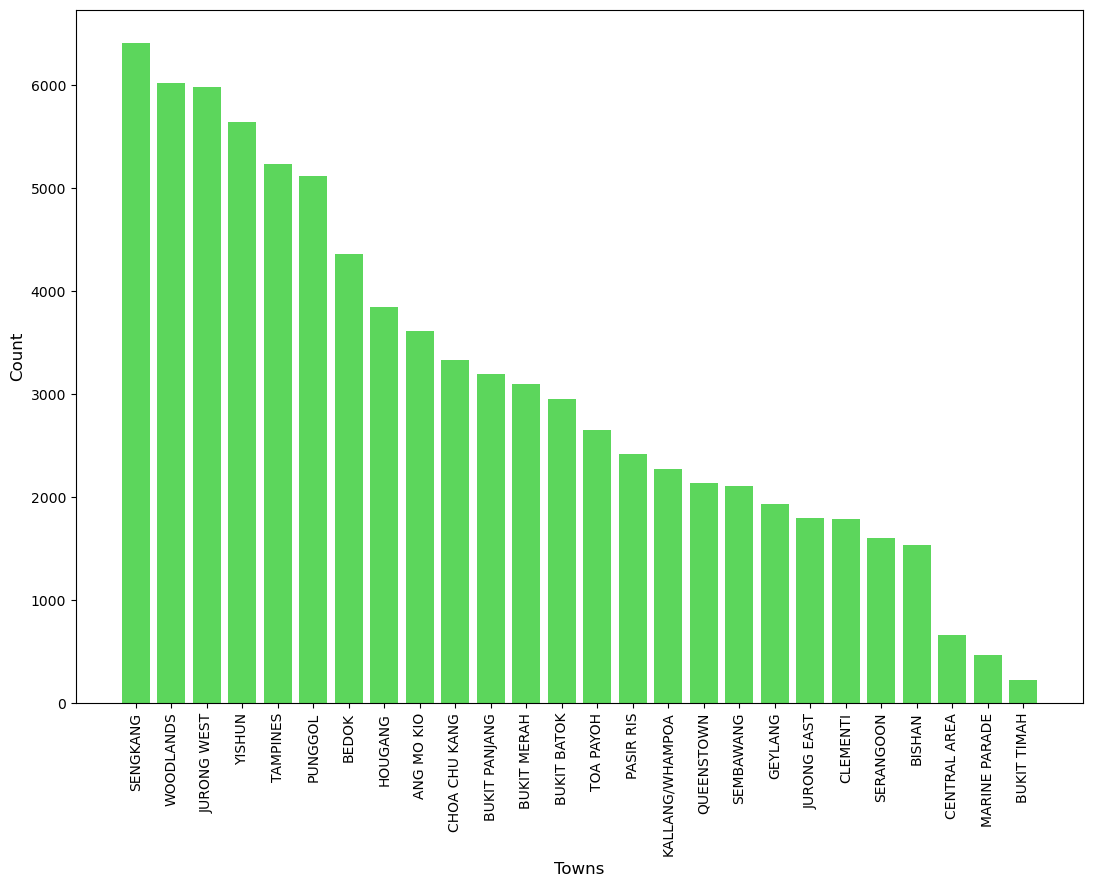

In [381]:
fig, ax = plt.subplots(figsize=(13, 9))
ax.bar(num_of_flats_by_town.index, num_of_flats_by_town["count"], color="#5cd65c")
ax.set_xlabel("Towns", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [382]:
count_flat_by_model = df.groupby(["town", "flat_model"])["flat_model"].count().to_frame(name = "count").reset_index()
count_flat_by_model

,town,flat_model,count
0,ANG MO KIO,Adjoined flat,34
1,ANG MO KIO,Apartment,21
2,ANG MO KIO,DBSS,181
3,ANG MO KIO,Improved,463
4,ANG MO KIO,Maisonette,4
...,...,...,...
219,YISHUN,Model A,2254
220,YISHUN,Multi Generation,21
221,YISHUN,New Generation,1056
222,YISHUN,Premium Apartment,61


In [383]:
print("Number of flat models in towns with the most number of flats")
print("SENGKANG:", count_flat_by_model[count_flat_by_model["town"] == "SENGKANG"]["flat_model"].count())
print("WOODLANDS:", count_flat_by_model[count_flat_by_model["town"] == "WOODLANDS"]["flat_model"].count())
print("JURONG WEST:", count_flat_by_model[count_flat_by_model["town"] == "JURONG WEST"]["flat_model"].count())
print("YISHUN:", count_flat_by_model[count_flat_by_model["town"] == "YISHUN"]["flat_model"].count())
print("TAMPINES:", count_flat_by_model[count_flat_by_model["town"] == "TAMPINES"]["flat_model"].count())

Number of flat models in towns with the most number of flats
SENGKANG: 7
WOODLANDS: 10
JURONG WEST: 12
YISHUN: 10
TAMPINES: 11


In [384]:
new_df = count_flat_by_model[count_flat_by_model["town"].isin(["WOODLANDS", "JURONG WEST", "TAMPINES"])]
new_df

,town,flat_model,count
115,JURONG WEST,Adjoined flat,4
116,JURONG WEST,Apartment,366
117,JURONG WEST,DBSS,45
118,JURONG WEST,Improved,1740
119,JURONG WEST,Maisonette,196
120,JURONG WEST,Model A,2234
121,JURONG WEST,Model A-Maisonette,23
122,JURONG WEST,Model A2,145
123,JURONG WEST,New Generation,287
124,JURONG WEST,Premium Apartment,862


AttributeError: 'FacetGrid' object has no attribute 'set_xlabel'

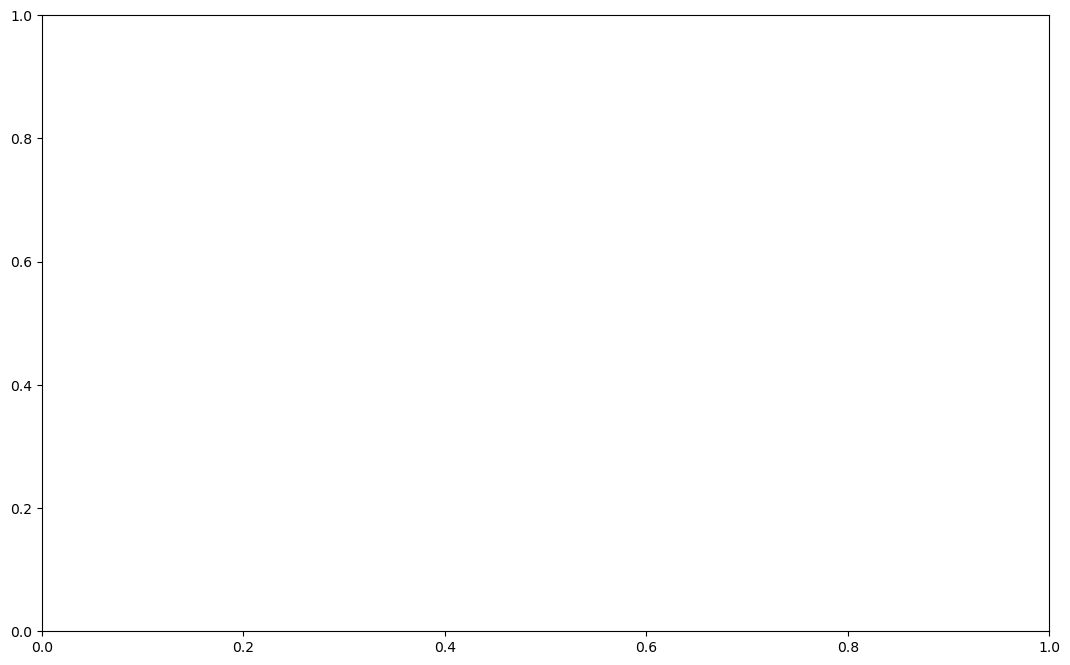

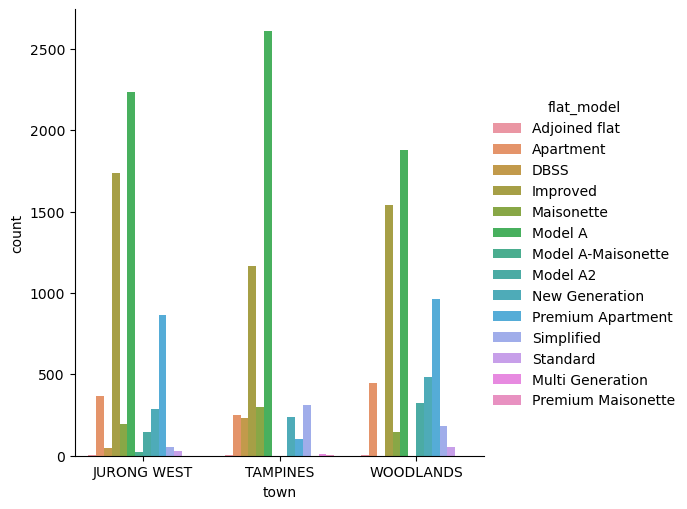

In [385]:
fig, ax = plt.subplots(figsize=(13, 8))
ax = sns.catplot(x="town", y="count", hue="flat_model", data=new_df, kind="bar")
ax.set_xlabel("Regions", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [386]:
df_jurong_west = df[df["town"] == "JURONG WEST"]
df_jurong_west = df_jurong_west.groupby("year")["resale_price"].mean().to_frame(name="mean_price").reset_index()
df_jurong_west.head()

,year,mean_price
0,2017-01-01,402120.214286
1,2017-02-01,390337.933333
2,2017-03-01,395489.090909
3,2017-04-01,388023.527324
4,2017-05-01,404778.172840


In [387]:
df_woodlands = df[df["town"] == "WOODLANDS"]
df_woodlands = df_woodlands.groupby("year")["resale_price"].mean().to_frame(name="mean_price").reset_index()
df_woodlands.head()

,year,mean_price
0,2017-01-01,390294.734940
1,2017-02-01,393542.756757
2,2017-03-01,384942.636364
3,2017-04-01,394866.715328
4,2017-05-01,380086.545455


In [388]:
df_sengkang = df[df["town"] == "SENGKANG"]
df_sengkang = df_sengkang.groupby("year")["resale_price"].mean().to_frame(name="mean_price").reset_index()
df_sengkang.head()

,year,mean_price
0,2017-01-01,421884.740741
1,2017-02-01,441528.963855
2,2017-03-01,430277.459459
3,2017-04-01,433445.666667
4,2017-05-01,430690.857143


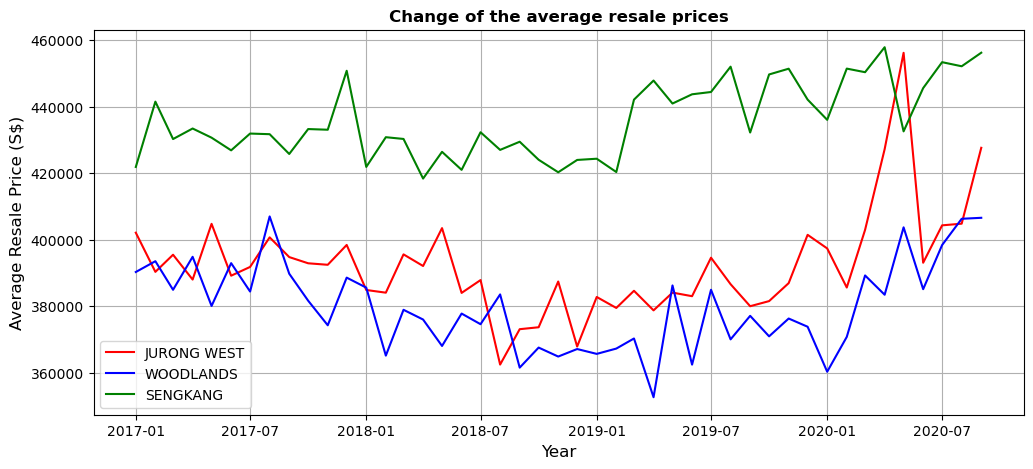

In [392]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_jurong_west["year"], df_jurong_west["mean_price"], color="r", label="JURONG WEST")
ax.plot(df_woodlands["year"], df_woodlands["mean_price"], color="b", label="WOODLANDS")
ax.plot(df_sengkang["year"], df_sengkang["mean_price"], color="g", label="SENGKANG")
ax.grid(True)
ax.set_title("Change of the average resale prices", fontweight="bold")
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Average Resale Price (S$)", fontsize=12)

lines, handles = ax.get_legend_handles_labels()
ax.legend(lines, handles, loc="best")
plt.show()

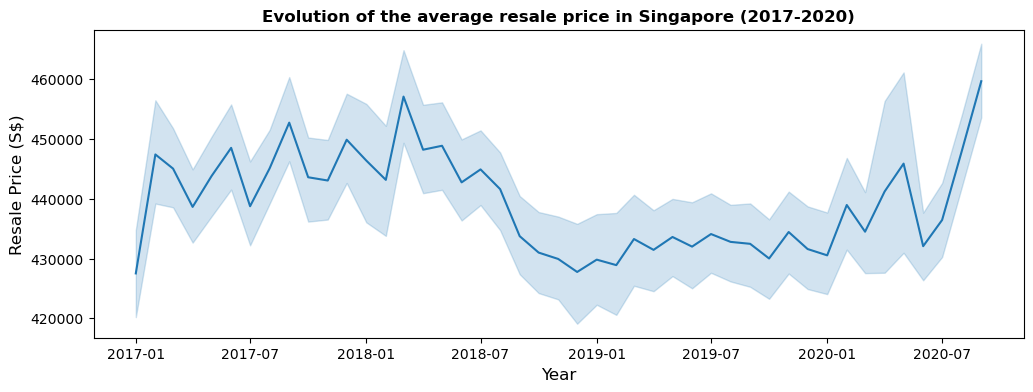

In [391]:
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.lineplot(x="year", y="resale_price", data=df)
ax.set_title("Evolution of the average resale price in Singapore (2017-2020)", fontweight="bold")
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Resale Price (S$)", fontsize=12)
plt.show()

<AxesSubplot:xlabel='month'>

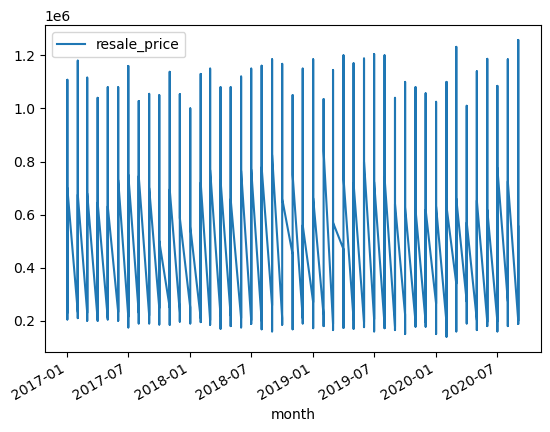

In [308]:
df_copy.plot(x='month', y='resale_price')

In [305]:
def mapper(month):
    return month.strftime('%b') 

df_copy['mesyac'] = df_copy['month'].apply(mapper)

In [306]:
df_copy 

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,mesyac
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,Jan
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,Jan
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,Jan
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,Jan
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...
80369,2020-09-01,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,66 years 03 months,440000.0,Sep
80370,2020-09-01,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,65 years 06 months,458000.0,Sep
80371,2020-09-01,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,66 years 04 months,490000.0,Sep
80372,2020-09-01,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,66 years 03 months,558000.0,Sep


In [297]:
def create_month(month):
    switcher = {
        "01": "Jan", 
        "02": "Feb",
        "03": "Mar",
        "04": "Apr",
        "05": "May",
        "06": "Jun",
        "07": "Jul",
        "08": "Aug",
        "09": "Sep",
        "10": "Oct",
        "11": "Nov",
        "12": "Dec"
    }
    
    return switcher.get(month.month, "NULL")

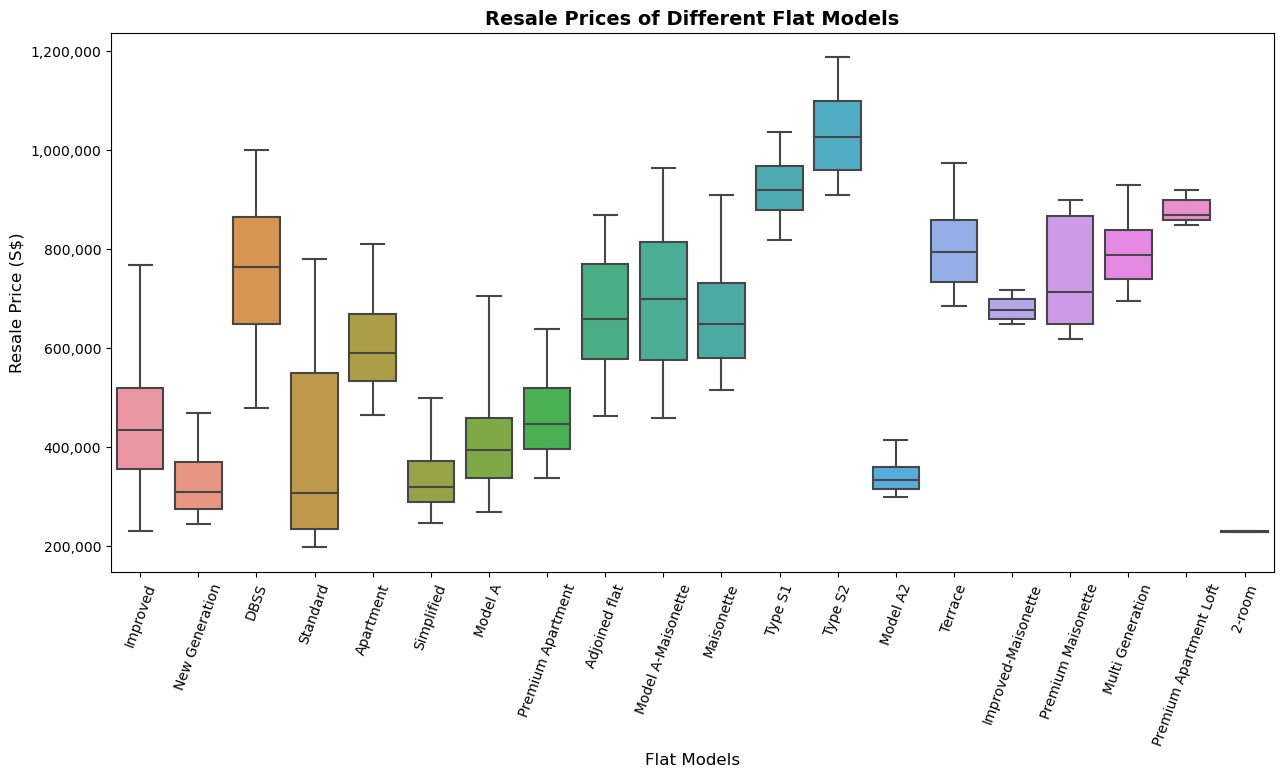

In [277]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.boxplot( x="flat_model", y="resale_price", data=df, whis=[5, 95], sym="")
ax.set_title("Resale Prices of Different Flat Models", fontsize = 14, fontweight='bold')
ax.set_xlabel("Flat Models", fontsize=12)
ax.set_ylabel("Resale Price (S$)", fontsize=12)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=70)
plt.show()

In [69]:
sorted(df['storey_range'].unique())

['01 TO 03',
 '04 TO 06',
 '07 TO 09',
 '10 TO 12',
 '13 TO 15',
 '16 TO 18',
 '19 TO 21',
 '22 TO 24',
 '25 TO 27',
 '28 TO 30',
 '31 TO 33',
 '34 TO 36',
 '37 TO 39',
 '40 TO 42',
 '43 TO 45',
 '46 TO 48',
 '49 TO 51']

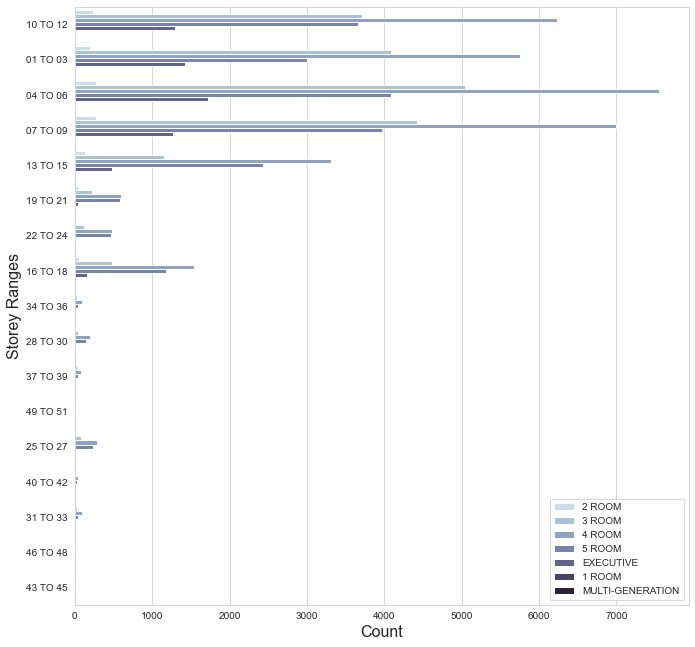

In [137]:
fig, ax = plt.subplots(figsize=(11, 11))
ax = sns.countplot(y='storey_range', hue='flat_type', palette='ch:s=.25,rot=-.25', data=df)
ax.set_xlabel('Count', fontsize=16)
ax.set_ylabel('Storey Ranges', fontsize=16)
plt.legend(loc='lower right')
plt.show()

In [73]:
df['floor_area_sqm'].describe()

count    80374.000000
mean        97.617804
std         24.285811
min         31.000000
25%         82.000000
50%         95.000000
75%        113.000000
max        249.000000
Name: floor_area_sqm, dtype: float64

In [139]:
bins_for_area = [30, 70, 160, 200, 250]
labels_for_area = ['small', 'medium', 'large', 'very large']
floor_area_group = pd.cut(df['floor_area_sqm'], bins_for_area, labels=labels_for_area)
floor_area_group_df = floor_area_group.value_counts().to_frame()
floor_area_group_df

,floor_area_sqm
medium,64241
small,15726
large,402
very large,5


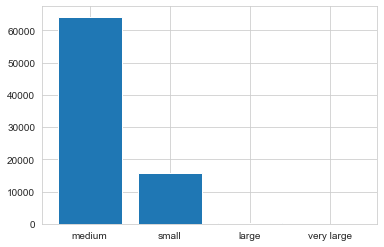

In [140]:
plt.bar(floor_area_group_df.index, floor_area_group_df['floor_area_sqm'])
plt.show()

In [54]:
df['resale_price'].describe()

count    8.037400e+04
mean     4.393165e+05
std      1.533902e+05
min      1.400000e+05
25%      3.300000e+05
50%      4.100000e+05
75%      5.150000e+05
max      1.258000e+06
Name: resale_price, dtype: float64

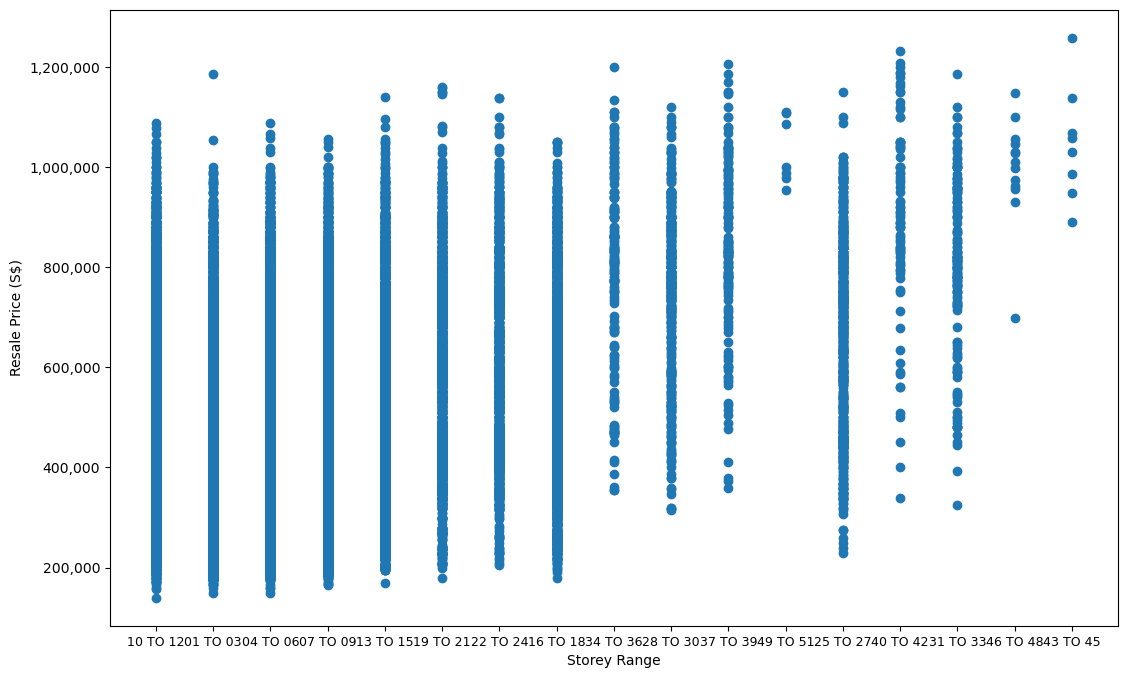

In [340]:
fig, ax = plt.subplots(figsize=[13, 8])
ax.scatter(df['storey_range'], df['resale_price'])
ax.set(xlabel="Storey Range", ylabel="Resale Price (S$)")
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(fontsize=9)
plt.show()

In [20]:
df[df['storey_range'] == '43 TO 45']

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
6504,2017-05-01,CENTRAL AREA,5 ROOM,1F,CANTONMENT RD,43 TO 45,107.0,Type S2,2011,92 years 08 months,1058000.0
17418,2017-11-01,CENTRAL AREA,4 ROOM,1D,CANTONMENT RD,43 TO 45,96.0,Type S1,2011,92 years 02 months,948000.0
17420,2017-11-01,CENTRAL AREA,5 ROOM,1E,CANTONMENT RD,43 TO 45,107.0,Type S2,2011,92 years 02 months,1138000.0
28714,2018-06-01,CENTRAL AREA,4 ROOM,1F,CANTONMENT RD,43 TO 45,94.0,Type S1,2011,91 years 07 months,985000.0
48995,2019-05-01,CENTRAL AREA,4 ROOM,1B,CANTONMENT RD,43 TO 45,93.0,Type S1,2011,90 years 09 months,1030000.0
60922,2019-11-01,CENTRAL AREA,4 ROOM,1F,CANTONMENT RD,43 TO 45,95.0,Type S1,2011,90 years 02 months,1068000.0
78480,2020-09-01,CENTRAL AREA,5 ROOM,1B,CANTONMENT RD,43 TO 45,107.0,Type S2,2011,89 years 04 months,1258000.0
79436,2020-09-01,QUEENSTOWN,4 ROOM,86,DAWSON RD,43 TO 45,87.0,Premium Apartment,2016,95 years,890000.0


In [22]:
grouped = df.groupby('town')
grouped.filter(lambda x: x['resale_price'].mean() > 710000.0)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
296,2017-01-01,BUKIT TIMAH,4 ROOM,4,TOH YI DR,07 TO 09,104.0,Model A,1988,70 years 07 months,670000.0
297,2017-01-01,BUKIT TIMAH,5 ROOM,5,FARRER RD,10 TO 12,120.0,Standard,1974,56 years 03 months,890000.0
298,2017-01-01,BUKIT TIMAH,EXECUTIVE,15,TOH YI DR,01 TO 03,146.0,Maisonette,1988,70 years 06 months,876888.0
1427,2017-02-01,BUKIT TIMAH,3 ROOM,4,QUEEN'S RD,07 TO 09,74.0,Improved,1974,56 years 02 months,425000.0
1428,2017-02-01,BUKIT TIMAH,5 ROOM,17,TOH YI DR,01 TO 03,122.0,Improved,1988,70 years 05 months,710000.0
...,...,...,...,...,...,...,...,...,...,...,...
78455,2020-09-01,BUKIT TIMAH,4 ROOM,2,QUEEN'S RD,04 TO 06,89.0,Improved,1974,52 years 07 months,575000.0
78456,2020-09-01,BUKIT TIMAH,4 ROOM,16,TOH YI DR,04 TO 06,104.0,Model A,1988,67 years 03 months,620000.0
78457,2020-09-01,BUKIT TIMAH,4 ROOM,1,TOH YI DR,01 TO 03,104.0,Model A,1988,66 years 10 months,620000.0
78458,2020-09-01,BUKIT TIMAH,4 ROOM,14,TOH YI DR,04 TO 06,104.0,Model A,1988,67 years 01 month,625000.0


In [59]:
high_avg_resale = df.groupby('town')['resale_price'].agg(['median'])
high_avg_resale.sort_values(by='median', ascending=False)

,median
town,
BUKIT TIMAH,713444.0
BISHAN,620000.0
BUKIT MERAH,580000.0
QUEENSTOWN,560000.0
CENTRAL AREA,500000.0
PASIR RIS,475000.0
SERANGOON,468000.0
KALLANG/WHAMPOA,460000.0
MARINE PARADE,460000.0


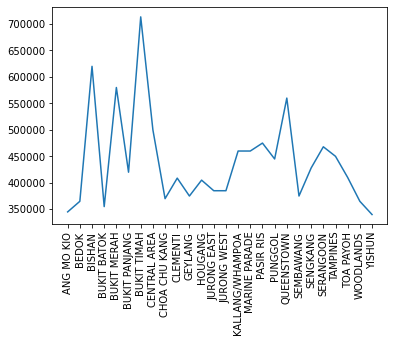

In [60]:
fig, ax = plt.subplots()
ax.plot(high_avg_resale.index, high_avg_resale['median'])
plt.xticks(rotation=90)
plt.show()

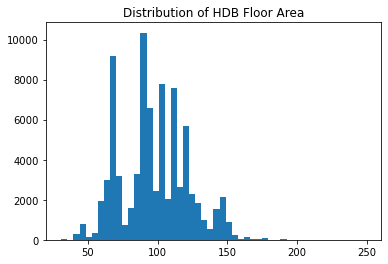

Apartment             423
Maisonette            399
Adjoined flat          46
Multi Generation       32
Model A-Maisonette      9
Terrace                 8
Model A                 3
Premium Maisonette      3
Name: flat_model, dtype: int64

In [27]:
plt.hist(df['floor_area_sqm'], bins=50)
plt.title('Distribution of HDB Floor Area')
plt.show()
display(df[df['floor_area_sqm'] > 150]['flat_model'].value_counts())

In [29]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,80374.000000,80374.000000,8.037400e+04
mean,97.617804,1994.117501,4.393165e+05
std,24.285811,12.839267,1.533902e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.300000e+05
50%,95.000000,1994.000000,4.100000e+05
75%,113.000000,2003.000000,5.150000e+05
max,249.000000,2019.000000,1.258000e+06


In [30]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='town'>

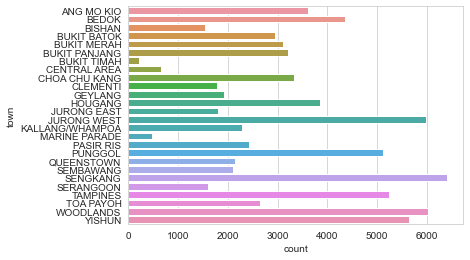

In [142]:
sns.countplot(y='town', data=df)

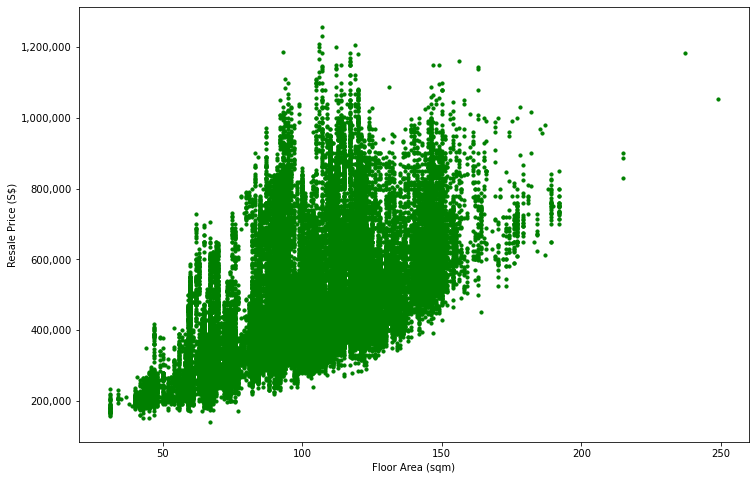

In [51]:
fig, ax = plt.subplots(figsize=(12, 8)) 
ax.scatter(df['floor_area_sqm'], df['resale_price'], s=10, color='g')
ax.set(xlabel="Floor Area (sqm)", ylabel="Resale Price (S$)")
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

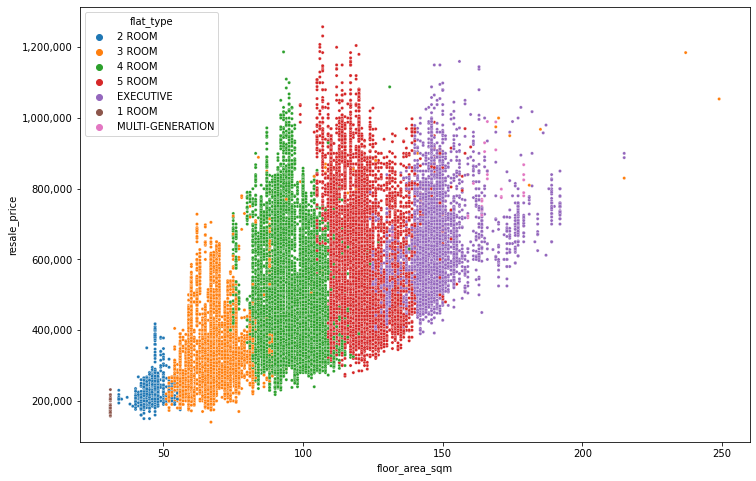

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.scatterplot(x='floor_area_sqm', y='resale_price', data=df, hue='flat_type', s=10, color='green')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_11412/2023925933.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


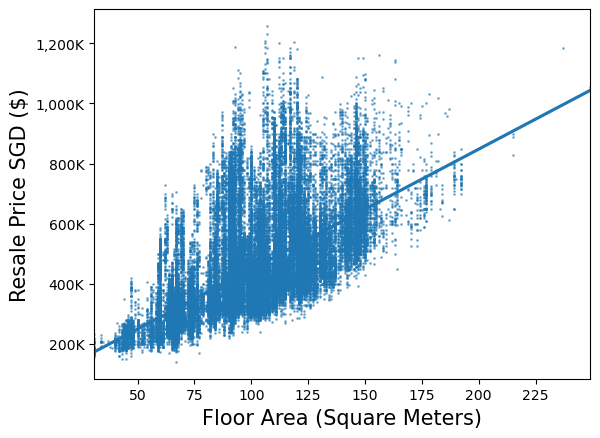

In [402]:
p=sns.regplot(x='floor_area_sqm', y='resale_price', data=df, scatter_kws={"s": 1, 'alpha':0.5})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
p.set_xlabel('Floor Area (Square Meters)', size=15)
plt.show()

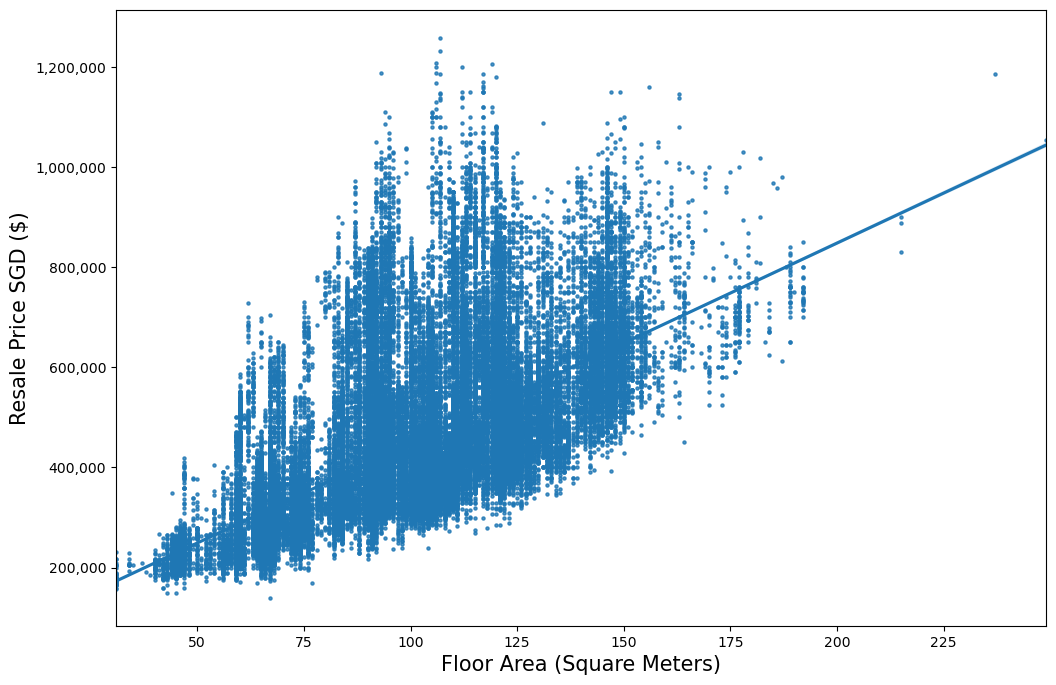

In [199]:
fig, ax = plt.subplots(figsize=[12, 8])
ax = sns.regplot(x='floor_area_sqm', y='resale_price', data=df, scatter_kws={"s": 5})
ax.set_ylabel('Resale Price SGD ($)', size=15)
ax.set_xlabel('Floor Area (Square Meters)', size=15)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

In [71]:
normalized = df.groupby('flat_type')['resale_price'].transform(lambda x: (x - x.mean())/(x.std()))

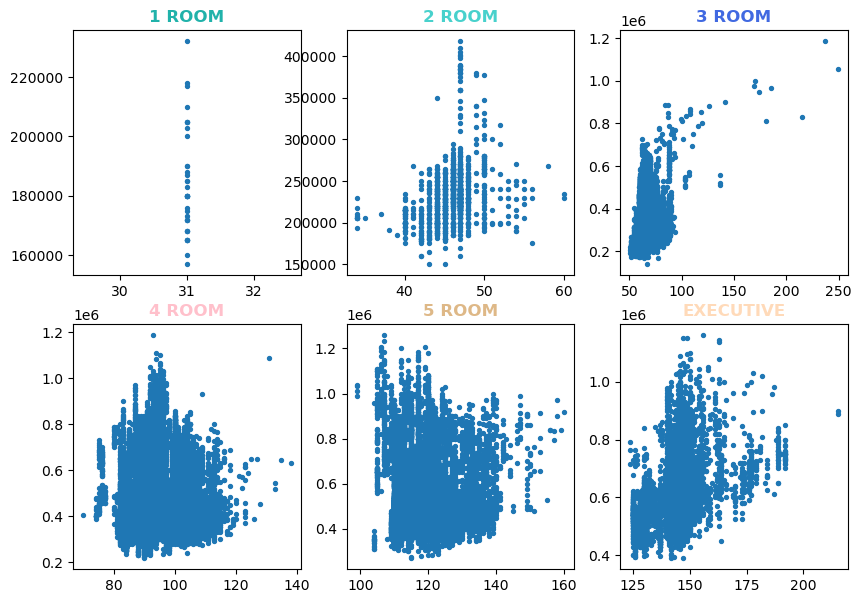

In [400]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))


ax[0, 0].scatter(x=df[df['flat_type'] == '1 ROOM']['floor_area_sqm'], y=df[df['flat_type'] == '1 ROOM']['resale_price'], s=8)
ax[0, 1].scatter(x=df[df['flat_type'] == '2 ROOM']['floor_area_sqm'], y=df[df['flat_type'] == '2 ROOM']['resale_price'], s=8)
ax[0, 2].scatter(x=df[df['flat_type'] == '3 ROOM']['floor_area_sqm'], y=df[df['flat_type'] == '3 ROOM']['resale_price'], s=8)
ax[1, 0].scatter(x=df[df['flat_type'] == '4 ROOM']['floor_area_sqm'], y=df[df['flat_type'] == '4 ROOM']['resale_price'], s=8)
ax[1, 1].scatter(x=df[df['flat_type'] == '5 ROOM']['floor_area_sqm'], y=df[df['flat_type'] == '5 ROOM']['resale_price'], s=8)
ax[1, 2].scatter(x=df[df['flat_type'] == 'EXECUTIVE']['floor_area_sqm'], y=df[df['flat_type'] == 'EXECUTIVE']['resale_price'], s=8)


ax[0, 0].set_title("1 ROOM", fontweight="bold", c="#20B2AA") 
ax[0, 1].set_title("2 ROOM", fontweight="bold", c="#48D1CC")
ax[0, 2].set_title("3 ROOM", fontweight="bold", c="#4169E1")
ax[1, 0].set_title("4 ROOM", fontweight="bold", c="#FFC0CB")
ax[1, 1].set_title("5 ROOM", fontweight="bold", c="#DEB887")
ax[1, 2].set_title("EXECUTIVE", fontweight="bold", c="#FFDAB9")


plt.show()

<AxesSubplot:>

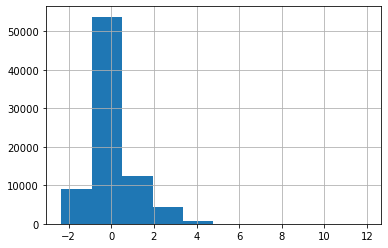

In [72]:
normalized.hist()

In [5]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [20]:
df['lease_commence_date'].unique()

array([1979, 1978, 1980, 1981, 1976, 1977, 2011, 2012, 1996, 1988, 1985,
       1986, 1974, 1984, 1983, 1987, 1982, 2000, 2001, 2005, 1989, 2010,
       1972, 1993, 1973, 1992, 1990, 1998, 2004, 1997, 1971, 1975, 1970,
       1969, 2013, 2008, 1999, 2003, 2002, 1995, 2006, 1967, 1968, 2007,
       1991, 1966, 2009, 1994, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [24]:
df.groupby('lease_commence_date').filter(lambda x: x['resale_price'].median() > 750000)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
46,2017-01-01,ANG MO KIO,4 ROOM,588C,ANG MO KIO ST 52,13 TO 15,90.0,DBSS,2011,93 years 08 months,688000.0
47,2017-01-01,ANG MO KIO,4 ROOM,588D,ANG MO KIO ST 52,19 TO 21,91.0,DBSS,2011,93 years 07 months,730000.0
48,2017-01-01,ANG MO KIO,4 ROOM,588D,ANG MO KIO ST 52,22 TO 24,91.0,DBSS,2011,93 years 07 months,756000.0
53,2017-01-01,ANG MO KIO,5 ROOM,588A,ANG MO KIO ST 52,10 TO 12,112.0,DBSS,2011,93 years 07 months,770000.0
138,2017-01-01,BISHAN,4 ROOM,275A,BISHAN ST 24,34 TO 36,95.0,DBSS,2011,93 years 07 months,808000.0
...,...,...,...,...,...,...,...,...,...,...,...
79469,2020-09-01,SEMBAWANG,2 ROOM,513,WELLINGTON CIRCLE,13 TO 15,40.0,Model A,2011,89 years 08 months,215000.0
79639,2020-09-01,SENGKANG,4 ROOM,439A,SENGKANG WEST AVE,16 TO 18,94.0,Model A,2011,89 years 06 months,438000.0
79640,2020-09-01,SENGKANG,4 ROOM,439C,SENGKANG WEST AVE,10 TO 12,94.0,Model A,2011,89 years 05 months,409888.0
79641,2020-09-01,SENGKANG,4 ROOM,439A,SENGKANG WEST AVE,16 TO 18,94.0,Model A,2011,89 years 05 months,440000.0


In [ ]:
df.groupby('town')[]

In [412]:
prices1720_4room = df[(df['flat_type'].isin(['4 ROOM']))].groupby(['town'], as_index=False).agg({'resale_price': 'median'})
prices1720_4room.head(7)

,town,resale_price
0,ANG MO KIO,430000.0
1,BEDOK,403000.0
2,BISHAN,554000.0
3,BUKIT BATOK,376000.0
4,BUKIT MERAH,670000.0
5,BUKIT PANJANG,385000.0
6,BUKIT TIMAH,638444.0


In [413]:
prices1720_3room = df[(df['flat_type'].isin(['3 ROOM']))].groupby(['town'], as_index=False).agg({'resale_price': 'median'})
prices1720_3room.head(7)

,town,resale_price
0,ANG MO KIO,288000.0
1,BEDOK,286000.0
2,BISHAN,371500.0
3,BUKIT BATOK,262500.0
4,BUKIT MERAH,340000.0
5,BUKIT PANJANG,295000.0
6,BUKIT TIMAH,410000.0


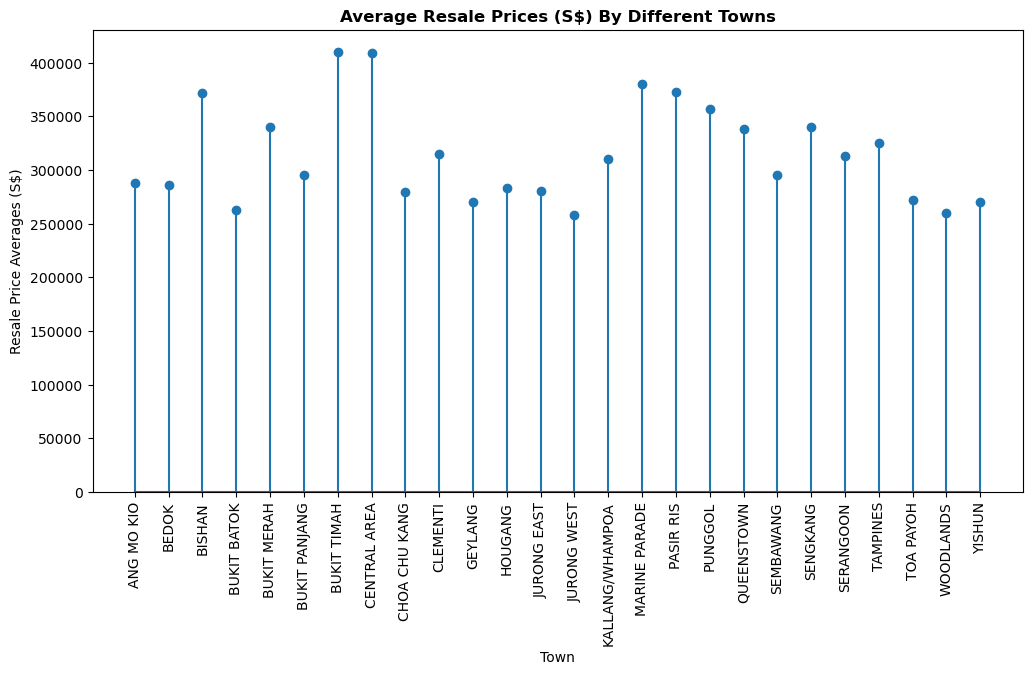

In [420]:
fig, ax = plt.subplots(figsize=(12, 6))


ax.stem(prices1720_3room["town"], prices1720_3room['resale_price'], use_line_collection=True)
ax.set_ylim(0)
  
plt.title('Average Resale Prices (S$) By Different Towns', fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel('Town')
plt.ylabel('Resale Price Averages (S$)')
plt.show()